In [1]:
# importing the required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import seaborn as sns

C:\Users\C. Dev\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import data into Python environment

In [2]:
# reading the csv file storing in a dataframe and viewing

complaints_df = pd.read_csv(r'C:\Users\C. Dev\Downloads\1568699544_comcast_telecom_complaints_data\Comcast_telecom_complaints_data.csv')
complaints_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(complaints_df)

In [3]:
# dataframe description 

complaints_df.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [4]:
# dataframe information 

complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null object
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


## Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [6]:
# Converting the type of the attribute "Date_month_year" from object to datetime

complaints_df['Date_month_year'] = pd.to_datetime(complaints_df['Date_month_year'])

In [7]:
# Counting the number of complaints every month

monthly_compaints = complaints_df.set_index('Date_month_year').resample('M')["Customer Complaint"].count()
print(monthly_compaints)

Date_month_year
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, Name: Customer Complaint, dtype: int64


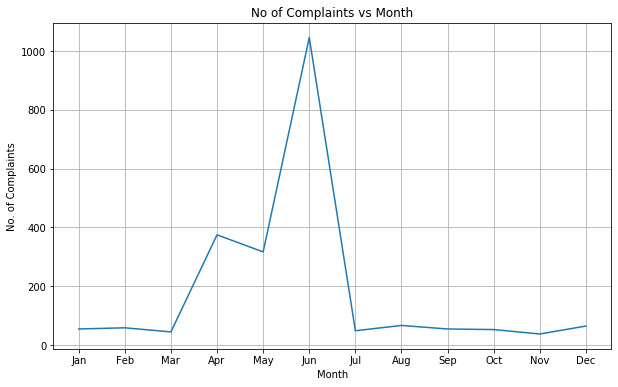

In [86]:
# Plotting a trend chart between the No of Complaints every month

x = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
y = monthly_compaints
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("No. of Complaints")
plt.title('No of Complaints vs Month')
plt.plot(x,y)

In [9]:
# Counting the number of complaints every day

daily_complaints = complaints_df.set_index('Date_month_year').resample('D')["Customer Complaint"].count()
print(daily_complaints)

Date_month_year
2015-01-04    18
2015-01-05    12
2015-01-06    25
2015-01-07     0
2015-01-08     0
              ..
2015-12-02     0
2015-12-03     0
2015-12-04    15
2015-12-05     7
2015-12-06    43
Freq: D, Name: Customer Complaint, Length: 337, dtype: int64


C:\Users\C. Dev\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


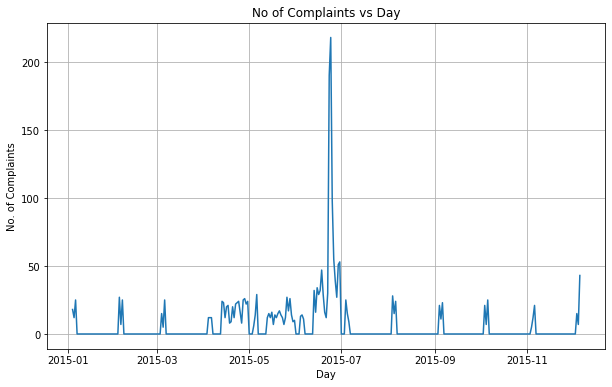

In [10]:
# Plotting a trend chart between the No of Complaints every day

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Day")
plt.ylabel("No. of Complaints")
plt.title('No of Complaints vs Day')
plt.plot(daily_complaints)

## Provide a table with the frequency of complaint types

In [11]:
# Counting the frequencies of various complaint types

issue = {}
x = complaints_df['Customer Complaint'].str.contains("network",case = False).value_counts()
issue['network_issue'] = x[1]
x = complaints_df['Customer Complaint'].str.contains("internet",case = False).value_counts()
issue['internet_issue'] = x[1]
x = complaints_df['Customer Complaint'].str.contains("bill",case = False).value_counts()
issue['bill_issue'] = x[1]
x = complaints_df['Customer Complaint'].str.contains("email",case = False).value_counts()
issue['email_issue'] = x[1]
x = complaints_df['Customer Complaint'].str.contains("charge",case = False).value_counts()
issue['charge_issue'] = x[1]
issue['other_issues'] = complaints_df.shape[0] - (sum(issue.values()))
for k in issue:
    print(k,"\t",issue[k])

network_issue 	 2
internet_issue 	 532
bill_issue 	 379
email_issue 	 16
charge_issue 	 139
other_issues 	 1156


## Which complaint types are maximum i.e., around internet, network issues, or across any other domains

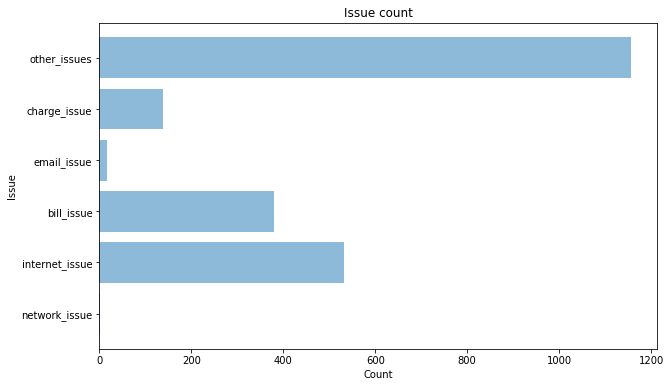

In [12]:
# Plotting a bar chart on issue count

plt.figure(figsize=(10,6))
plt.barh(list(issue.keys()),issue.values(), align='center', alpha=0.5)
plt.title('Issue count')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.show()

## Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [13]:
# Creating a new attribute "NewStatus" and changing the status of the complaints

complaints_df["NewStatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in complaints_df["Status"]]
complaints_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,NewStatus
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,Closed
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,Open
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,Closed
8,318072,Comcast extended outages,06-01-15,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,Closed
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,Open


## Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3


In [15]:
# Statewise status of complaints 

Status_Complaints = complaints_df.groupby(["State","NewStatus"]).size().unstack().fillna(0)
print(Status_Complaints)

NewStatus             Closed  Open
State                             
Alabama                 17.0   9.0
Arizona                 14.0   6.0
Arkansas                 6.0   0.0
California             159.0  61.0
Colorado                58.0  22.0
Connecticut              9.0   3.0
Delaware                 8.0   4.0
District Of Columbia    14.0   2.0
District of Columbia     1.0   0.0
Florida                201.0  39.0
Georgia                208.0  80.0
Illinois               135.0  29.0
Indiana                 50.0   9.0
Iowa                     1.0   0.0
Kansas                   1.0   1.0
Kentucky                 4.0   3.0
Louisiana               12.0   1.0
Maine                    3.0   2.0
Maryland                63.0  15.0
Massachusetts           50.0  11.0
Michigan                92.0  23.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Missouri                 3.0   1.0
Montana                  1.0   0.0
Nevada                   1.0   0.0
New Hampshire       

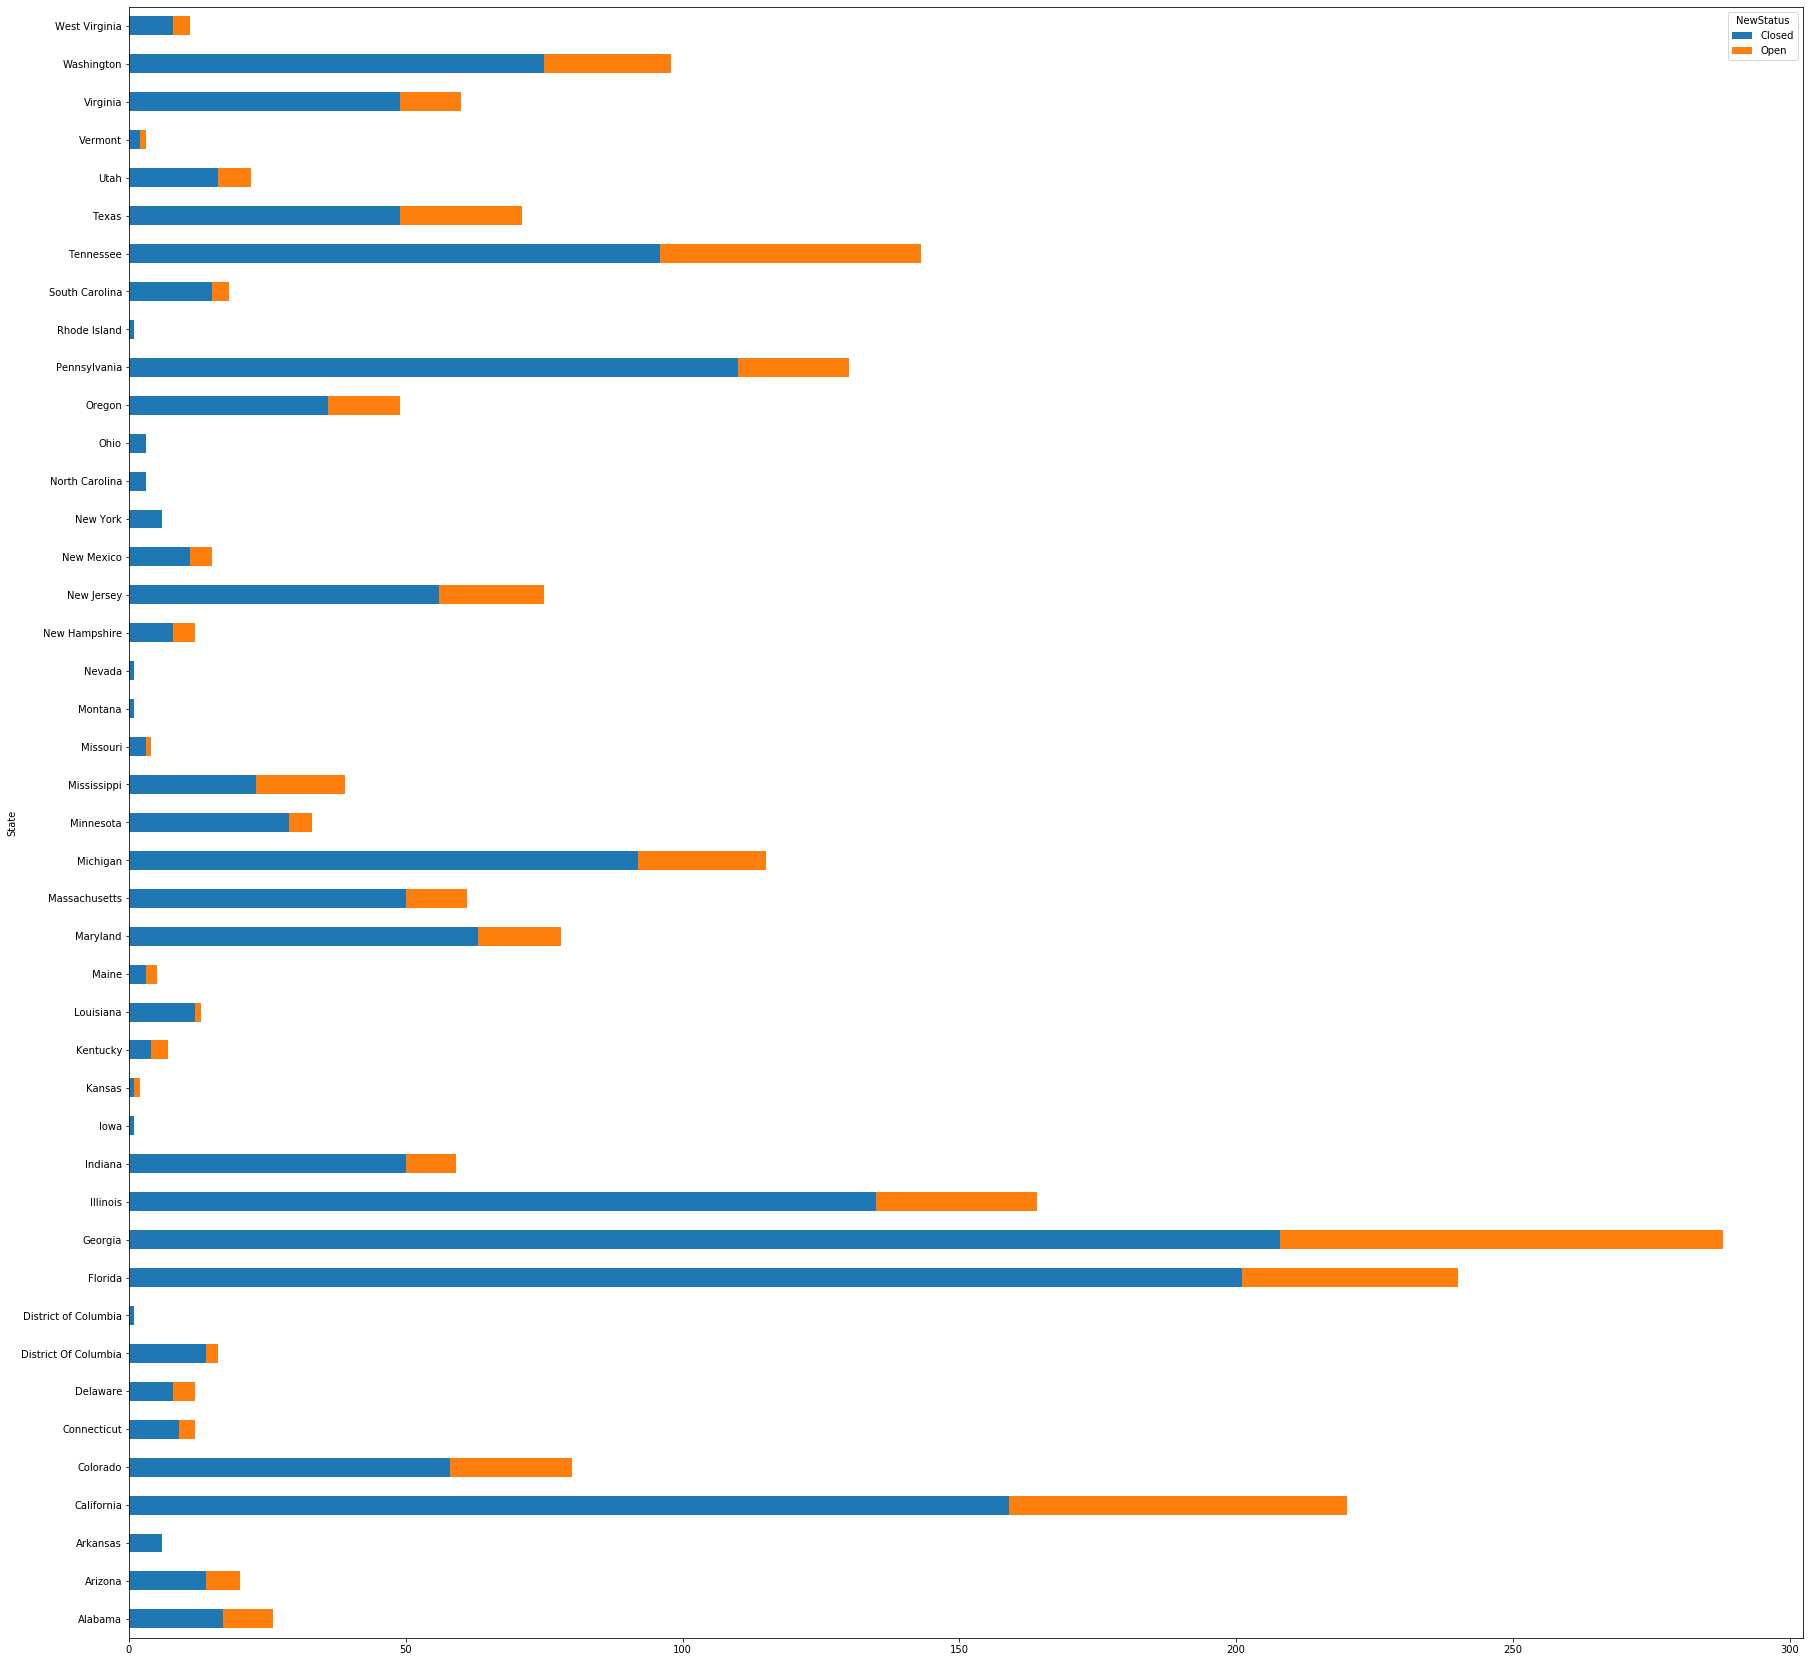

In [25]:
# Stacked barchart on statewise status of complaints

Status_Complaints.plot(kind = "barh", figsize = (30,30), stacked = True)

## Which state has the maximum complaints


In [105]:
# Finding the state with maximum complaints

x = complaints_df.groupby(["State"]).size().sort_values(ascending=False)
print(x)
print("\n\nGeorgia has maximum complaints with a value of",x[0])

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
New Hampshire            12
Connecticut              12
Delaware                 12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

## Which state has the highest percentage of unresolved complaints

In [129]:
# Finding the state with highest percentage of unresolved complaints

x = Status_Complaints["Open"].sort_values(ascending = False)
print((x/x.sum())*100)
print("\n\nGeorgia has the highest percentage of unresolved complaints with percentage values of",(x[0]/x.sum())*100,"%")

State
Georgia                 15.473888
California              11.798839
Tennessee                9.090909
Florida                  7.543520
Illinois                 5.609284
Michigan                 4.448743
Washington               4.448743
Texas                    4.255319
Colorado                 4.255319
Pennsylvania             3.868472
New Jersey               3.675048
Mississippi              3.094778
Maryland                 2.901354
Oregon                   2.514507
Massachusetts            2.127660
Virginia                 2.127660
Indiana                  1.740812
Alabama                  1.740812
Utah                     1.160542
Arizona                  1.160542
Delaware                 0.773694
Minnesota                0.773694
New Mexico               0.773694
New Hampshire            0.773694
West Virginia            0.580271
South Carolina           0.580271
Kentucky                 0.580271
Connecticut              0.580271
Maine                    0.386847
District

## Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [161]:
x = complaints_df.groupby(["Received Via","NewStatus"]).size()
print(x)

Received Via        NewStatus
Customer Care Call  Closed       864
                    Open         255
Internet            Closed       843
                    Open         262
dtype: int64


In [171]:
#Finding percentage of complaints resolved till date, which were received through the Internet and customer care calls

resolvedcomplants_internet = (x['Internet']['Closed']/(x['Internet']['Open'] + x['Internet']['Closed']))*100
resolvedcomplants_custcarecall = (x['Customer Care Call']['Closed']/(x['Customer Care Call']['Open'] + x['Customer Care Call']['Closed']))*100
unresolvedcomplaints_internet = 100 - resolvedcomplants_internet
unresolvedcomplaints_custcarecall = 100 - resolvedcomplants_custcarecall
print("Percentage of complaints resolved till date, which were received through the Internet is",resolvedcomplants_internet,"%")
print("Percentage of complaints resolved till date, which were received through the Customer Care Call is",resolvedcomplants_custcarecall,"%")

Percentage of complaints resolved till date, which were received through the Internet is 76.289592760181 %
Percentage of complaints resolved till date, which were received through the Customer Care Call is 77.21179624664879 %


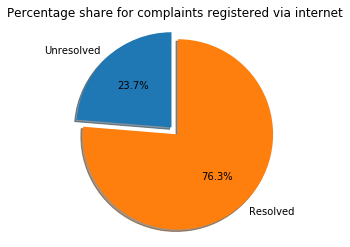

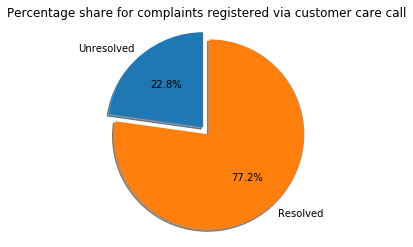

In [178]:
# Plotting pie chart on resolved and unresolved complaints which were received through the Internet and customer care calls 

labels = "Unresolved","Resolved"
sizes1 = [unresolvedcomplaints_internet,resolvedcomplants_internet]
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes1, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage share for complaints registered via internet")
plt.show()

sizes2 = [unresolvedcomplaints_custcarecall,resolvedcomplants_custcarecall]
fig1, ax1 = plt.subplots()
ax1.pie(sizes2, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage share for complaints registered via customer care call")
plt.show()